In [6]:
# ETHZ model: postage stamps supp figure
#
#
# Original: vikki.thompson 19/06/2023
# Last Editted 24/01/2025


In [1]:
### Load neccessary libraries
import subprocess
import numpy as np
import iris
import sys
import matplotlib.pyplot as plt
sys.path.append('/usr/people/thompson/WP1/boosting')
import functions_boosting as gboost
sys.path.append('/usr/people/thompson/WP1')
import functions_get_data as gdata
import functions_plot_data as pdata
import cartopy.crs as ccrs
import cartopy.feature as cf
plt.ion(); plt.show()


In [2]:
R1 = [60, 40, 20, -10] 
PREC = []; Z500 = []
for i in np.arange(25):
    PREC.append(gboost.get_TP_cube(str(20070816), str(20070825), R1, i))
    Z500.append(gboost.get_Z500_cube(str(20070816), str(20070825), R1, i))

GP = []; Ar = []
rain_region = [52, 48, 9, 4]

for i in PREC:
    r = gboost.extract_region(i, rain_region)
    Ar.append(r.collapsed(['latitude', 'longitude'], iris.analysis.MEAN).data)
    GP.append(r.collapsed(['latitude', 'longitude'], iris.analysis.MAX).data)

/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/cube.py:3859: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'latitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'latitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))
/usr/people/thompson/anaconda3/envs/butterfly/lib/python3.9/site-packages/iris/coords.py:2237: UserWarning: Cannot check if coordinate is contiguous: Invalid operation for 'longitude', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'longitude'. Ignoring bounds.
  warnings.warn(msg.format(str(exc), self.name()))


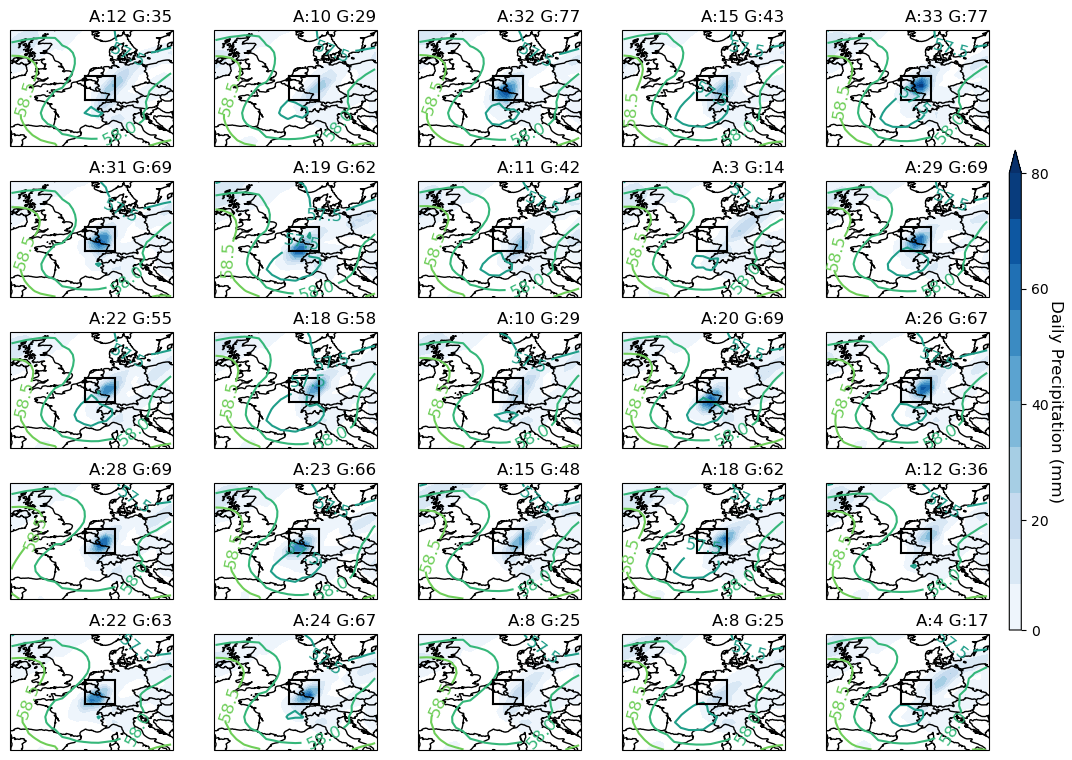

In [12]:
## Event choice supplementary figure
fig, axs = plt.subplots(nrows=5, ncols=5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,12))
axs_list = [axs[0,0], axs[0,1], axs[0,2], axs[0,3], axs[1,0], axs[1,1], axs[1,2], axs[1,3]]
for i, ax in enumerate(axs.reshape(-1)):
    lats=Z500[i].coord('latitude').points
    lons=Z500[i].coord('longitude').points
    c = ax.contourf(lons, lats, PREC[i].data, levels=np.linspace(1, 80, 11), cmap = plt.cm.get_cmap('Blues'), transform=ccrs.PlateCarree(), extend='max')
    c2 = ax.contour(lons, lats, Z500[i].data/100, levels=np.arange(55, 60, .5), cmap = plt.cm.get_cmap('viridis'), transform=ccrs.PlateCarree(), extend='both')
    ax.set_ylim([40, 60])
    ax.set_xlim([-9, 19])
    ax.clabel(c2, inline=1, fontsize=12)
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.COASTLINE)
    ax.set_title('A:'+format(Ar[i], '.0f')+' G:'+format(GP[i], '.0f'), loc='right')
    pdata.plot_box(ax, [48, 52, 4, 9])

cbar_ax = fig.add_axes([0.85, 0.3, 0.01, 0.4])
fig.colorbar(c, cax=cbar_ax, ticks=np.arange(0, 100, 20))
cbar_ax.set_ylabel('Daily Precipitation (mm)', labelpad=10, rotation=270, fontsize=12)
plt.subplots_adjust(top = .8, bottom = .2, right = .85, left = 0, 
            hspace = 0.3, wspace = 0)
#plt.tight_layout()